<a href="https://colab.research.google.com/github/jiminmini/mini/blob/main/4_7_%ED%95%84%EC%82%AC%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[개념 정리]**

---

#**앙상블 알고리즘**


*   랜덤 포레스트

*   그래디언트 부스팅

*   학습유형: 보팅, 배깅, 부스팅

-배깅: 각각의 분류기가 모두 같은 유형의 알고리즘(랜덤 포레스트 알고리즘)

-부스팅: 여러 분류기가 순차적으로 가중치를 부여하면서 학습과 예측 진행

---
#**보팅**


*   투표를 통한 최종 예측 결과 결정

*   다른 알고리즘을 가진 분류기 결합

*   하드 보팅: 다수결 원칙과 유사

*   소프트 보팅: 레이블 값의 평균 중 가장 높은 레이블 값이 최종 보팅 결괏값(일반적)


**보팅 분류기**

*   로지스틱 회귀, KNN 기반

*   voting: 경우에 맞는 보팅(기본은 'hard')


---

#**랜덤 포레스트**

*   배깅의 대표적 알고리즘

*   빠른 수행속도, 높은 예측 성능

*   여러 개의 결정 트리 분류기-배깅 방식

*   하이퍼 파리미터 튜닝: GridSearchCV


---

#**GBM**

*   약한 학습기에 가중치 부여하며 오류 개선

*   에이다 부스트


*   그래디언트 부스트


*   하이퍼 파라미터
---
#**XGBoost**


*   병렬 CPU 환경에서 병렬 학습 가능


*   하이퍼 파라미터: GBM과 유사


*   booster, silent, nthread

#**[코드 필사]**

In [ ]:
pip install --upgrade --force-reinstall numpy pandas scikit-learn xgboost

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached xgboost-3.0.0-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached nvidia_nccl_cu12-2.26.2-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.0 kB)
  Using cached six-1.17.0-py2.py3-non

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
 # 개별 모델은 로지스틱 회귀와 KNN임.
Ir_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

 # 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators=[('LR', Ir_clf), ('KNN', knn_clf)], voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state= 156)

 # VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [Ir_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def get_human_dataset():
    data = load_iris()
    return data.data, data.target

# X, y 반환받고 직접 나눔
X, y = get_human_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 랜덤 포레스트 학습 및 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 1.0000


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
'max_depth': [8, 16, 24],
'min_samples_leaf' : [1, 6, 12],
'min_samples_split' : [2, 8, 16]
}

 # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 8}
최고 예측 정확도: 0.9500


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                                 min_samples_split=2, random_state=0)

rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 1.0000


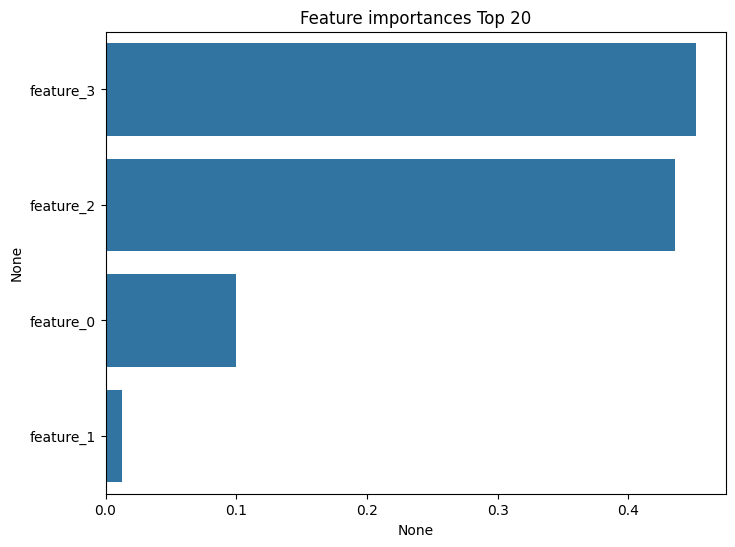

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X_train = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

def get_human_dataset():
    data = load_iris()
    X = data.data
    y = data.target
    # 여기서 4개로 나눠서 반환!
    return train_test_split(X, y, test_size=0.2, random_state=0)

# 이제 이렇게 한 줄로 4개 받을 수 있음
X_train, X_test, y_train, y_test = get_human_dataset()

 # GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time()- start_time))

GBM 정확도: 1.0000
GBM 수행 시간: 0.3 초 


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
import xgboost
print(xgboost.__version__)

3.0.0


In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features= dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']= labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [ ]:
 # cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = cancer_df.iloc[:, :-1 ]
y_label = cancer_df.iloc[:, -1 ]

 # 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2,
random_state= 156 )
 # 위에서 만든 X.train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )
print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [ ]:
 # 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환.
 # 학습, 검증, 테스트용 DMatrix를 생성.
import xgboost as xgb

dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb. DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = { 'max.depth':3,
            'eta': 0.05,
            'objective':'binary:logistic',
            'eval_metric':'logloss'
        }
num_rounds = 400

In [ ]:
 # 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다.
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval/eval')] 만 명기해도 무방.

 # 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.62387	eval-logloss:0.62700
[1]	train-logloss:0.58495	eval-logloss:0.59823
[2]	train-logloss:0.54966	eval-logloss:0.57299
[3]	train-logloss:0.51735	eval-logloss:0.55040
[4]	train-logloss:0.48791	eval-logloss:0.52853
[5]	train-logloss:0.46066	eval-logloss:0.50704
[6]	train-logloss:0.43481	eval-logloss:0.48815
[7]	train-logloss:0.41158	eval-logloss:0.47184
[8]	train-logloss:0.39010	eval-logloss:0.45683
[9]	train-logloss:0.37018	eval-logloss:0.44222
[10]	train-logloss:0.35167	eval-logloss:0.42944
[11]	train-logloss:0.33381	eval-logloss:0.41720
[12]	train-logloss:0.31773	eval-logloss:0.40596
[13]	train-logloss:0.30255	eval-logloss:0.39622
[14]	train-logloss:0.28789	eval-logloss:0.38590
[15]	train-logloss:0.27459	eval-logloss:0.37752
[16]	train-logloss:0.26224	eval-logloss:0.36938
[17]	train-logloss:0.25053	eval-logloss:0.36191
[18]	train-logloss:0.23935	eval-logloss:0.35509
[19]	train-logloss:0.22853	eval-logloss:0.34790
[20]	train-logloss:0.21841	eval-logloss:0.34078
[2

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

      # 예측 확률이 0.5보다 크면 1 , 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.943 0.004 0.759 0.165 0.978 0.999 0.998 0.998 0.997 0.002]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba=None):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro')
    recall = recall_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')

    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f}'.format(
        accuracy, precision, recall, f1))

    if pred_proba is not None:
        try:
            roc_auc = roc_auc_score(y_test, pred_proba, multi_class='ovr')  # 다중 클래스용
            print('ROC AUC: {:.4f}'.format(roc_auc))
        except Exception as e:
            print('ROC AUC 계산 중 오류 발생:', e)

get_clf_eval(y_test , preds, pred_probs)

정확도: 0.9649, 정밀도: 0.9600, 재현율: 0.9600, F1: 0.9600
ROC AUC: 0.9947


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

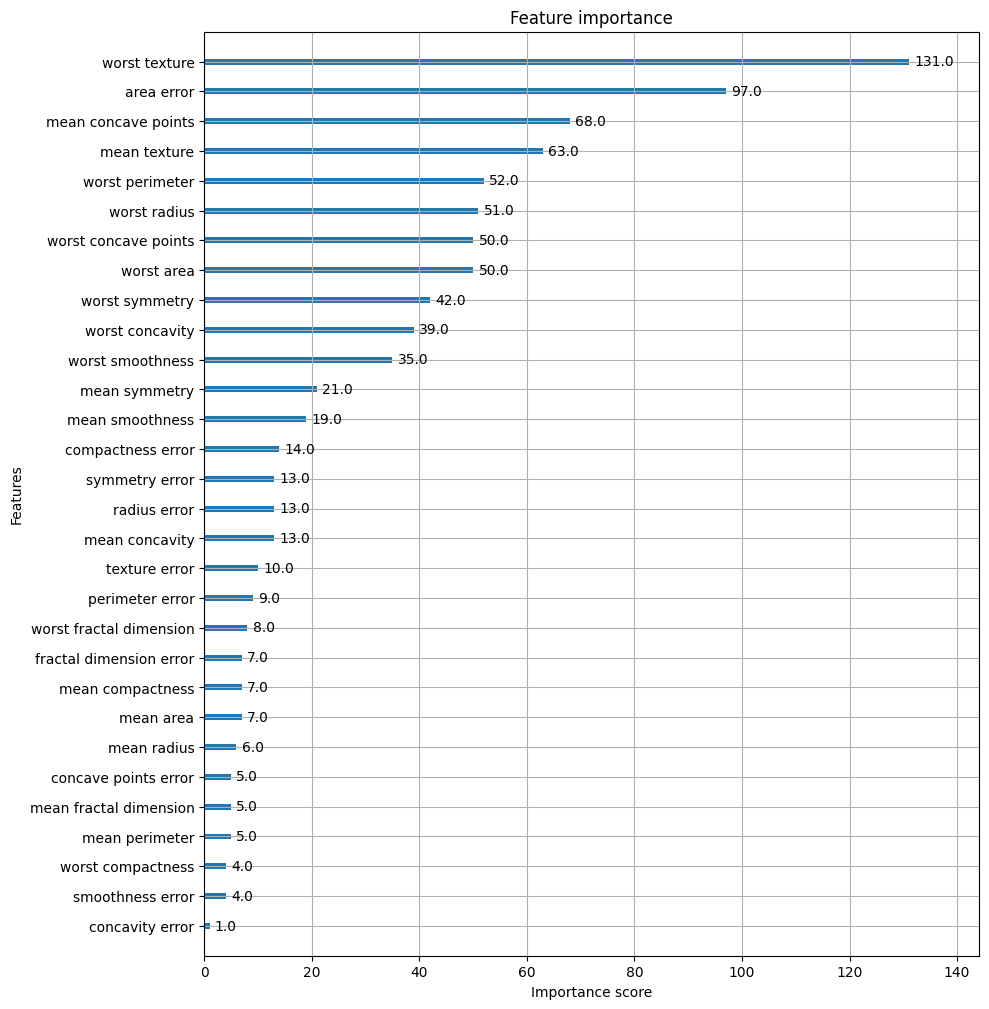

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [ ]:
 # 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

 # Warning 메시지를 없애기 위해 eval.metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test , w_preds, w_pred_proba)

정확도: 0.9649, 정밀도: 0.9667, 재현율: 0.9530, F1: 0.9594
ROC AUC: 0.9951


In [ ]:
pip install --upgrade xgboost

In [ ]:
import xgboost
print(xgboost.__version__)

3.0.0


In [ ]:
!pip uninstall xgboost -y

Found existing installation: xgboost 3.0.0
Uninstalling xgboost-3.0.0:
  Successfully uninstalled xgboost-3.0.0


In [ ]:
!pip install xgboost==1.7.6

  Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl.metadata (1.9 kB)
Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl (200.3 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.0.0
    Uninstalling xgboost-3.0.0:
      Successfully uninstalled xgboost-3.0.0


In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                            use_label_encoder=False, eval_metric="logloss")

evals = [(X_tr, y_tr), (X_val, y_val)]

xgb_wrapper.fit(X_tr, y_tr,
                early_stopping_rounds=50,
                eval_set=evals,
                verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]



NameError: name 'X_tr' is not defined

In [ ]:
get_clf_eval(y_test , ws50_preds, ws50_pred_proba)

NameError: name 'get_clf_eval' is not defined

In [ ]:
 # early_stopping_ro니nds를 10으로 설정하고 재학습.
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10,
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

NotFittedError: need to call fit or load_model beforehand

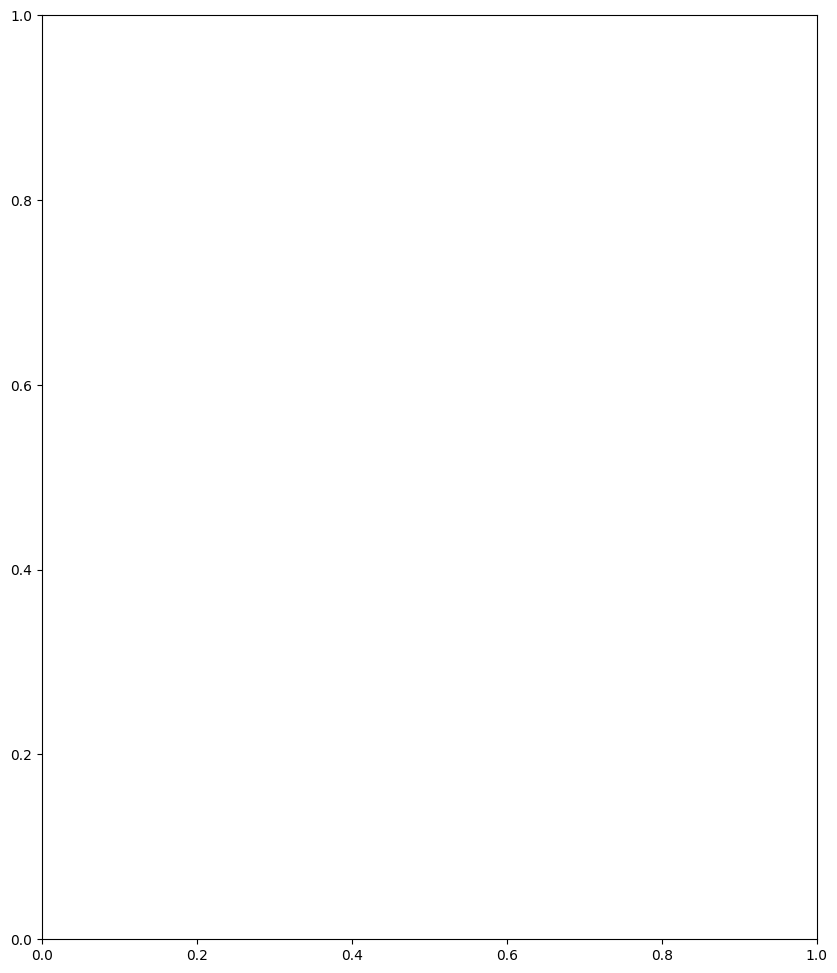

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)